In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [49]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [50]:
#  display random data entries
tracks_df.sample(10)

,song_title,artist_name,album_title,release_date,duration,popularity,uri
107587,Heartbreakfree,Ji Nilsson,Heartbreakfree,2014-04-25,198040,0,spotify:track:2mBqpAQLPXGC9RgoQaslmr
91581,"Straight, No Chaser (feat. John Coltrane, Cann...",Miles Davis,Milestones,1958-04,635066,46,spotify:track:7l5In0rLyHmqJhKlzZPtYo
27654,Church Bells,Carrie Underwood,Storyteller,2015-10-23,193333,67,spotify:track:67citk3uzWs5qbaIVKTeg8
135677,Papel Perfeito,Imaginasamba,Você Ou Ninguém Mais (Standard),2014-04-01,186000,18,spotify:track:3ksIzjmtQpDvmdfunLmNls
9051,Ultraviolence - Hook N Sling Remix,Lana Del Rey,Ultraviolence (Hook N Sling Remix),2015-02-13,329003,0,spotify:track:1AJoyUDeUcKaBnlWTpvldd
7839,Dark Sunglasses,Chrissie Hynde,Dark Sunglasses,2014-03-24,185226,0,spotify:track:3xgfTGhgVVo5Pzmjc87nqd
104477,"Tough Love (feat. Agnes, Vargas & Lagola)",Avicii,TIM,2019-06-06,191248,58,spotify:track:1yfyIdEw5U2bD5I6gxQCxW
150385,You Shook Me - 1993 Remaster,Led Zeppelin,Led Zeppelin,1969-01-12,388093,48,spotify:track:0CrseEjTnYoB625tKoUowp
67966,Our Own House,MisterWives,Our Own House,2015-01-13,232226,0,spotify:track:5ufmXqULgMsDIDSkSaXw1E
118748,Imagina A Sentada – Spotify Singles,Matheus & Kauan,Imagina A Sentada – Spotify Singles,2022-01-31,184053,64,spotify:track:2iJGrGll9mGg9pJCezwP85


In [51]:
#  display random data entries
audio_features_df.sample(10)

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
16150,spotify:track:2Rn3jeW7hCF5HZcKwPk06J,0.461,0.901,3,-4.099,1,0.1760,0.04810,0.000000,0.4620,0.796,168.872,4
142988,spotify:track:1bo70PKhvXropO4mHT8PuI,0.697,0.674,1,-5.216,0,0.0536,0.78600,0.000013,0.9720,0.514,102.025,4
15907,spotify:track:3OQtbwQ9U4A0VDH1rjamZJ,0.691,0.790,10,-10.263,0,0.0633,0.04180,0.000069,0.0910,0.746,108.266,4
18356,spotify:track:7dYrFpXsWTc9Ml2oVwu5jj,0.729,0.800,4,-5.657,0,0.0538,0.18400,0.000000,0.1590,0.518,130.032,4
107200,spotify:track:1trgRFfj4SCKy2Ww1nWTjc,0.368,0.839,7,-7.670,1,0.0427,0.00424,0.355000,0.0769,0.199,98.726,4
118848,spotify:track:14eggbtU5LaK77oKIduOyT,0.697,0.442,11,-7.570,0,0.0331,0.79200,0.000000,0.1090,0.595,139.952,4
55106,spotify:track:44rgPIFDJlZZuRnGzCElll,0.627,0.242,10,-11.086,0,0.1200,0.86700,0.912000,0.2030,0.390,75.240,4
1499,spotify:track:0yJv0G7r1PZIl1CY5XhvkR,0.693,0.763,4,-7.077,0,0.0299,0.01430,0.000000,0.1540,0.578,100.985,4
150998,spotify:track:1E3agX9ZGgws6CNbjDBKZJ,0.537,0.939,4,-4.914,1,0.0818,0.00919,0.000011,0.1390,0.343,144.954,4
77354,spotify:track:3lCfyDeaEYxEvJSnhv1ek3,0.505,0.911,10,-3.006,0,0.0624,0.03150,0.000018,0.0745,0.281,81.978,4


In [52]:
#  check dtypes of each column
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161056 entries, 0 to 161055
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   song_title    161056 non-null  object
 1   artist_name   161056 non-null  object
 2   album_title   161056 non-null  object
 3   release_date  160875 non-null  object
 4   duration      161056 non-null  int64 
 5   popularity    161056 non-null  int64 
 6   uri           161056 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.6+ MB


release_date column needs to be converted to datetime

In [53]:
#  check dtypes of each column
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160513 entries, 0 to 160512
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               160513 non-null  object 
 1   danceability      160513 non-null  float64
 2   energy            160513 non-null  float64
 3   key               160513 non-null  int64  
 4   loudness          160513 non-null  float64
 5   mode              160513 non-null  int64  
 6   speechiness       160513 non-null  float64
 7   acousticness      160513 non-null  float64
 8   instrumentalness  160513 non-null  float64
 9   liveness          160513 non-null  float64
 10  valence           160513 non-null  float64
 11  tempo             160513 non-null  float64
 12  time_signature    160513 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 15.9+ MB


<AxesSubplot: >

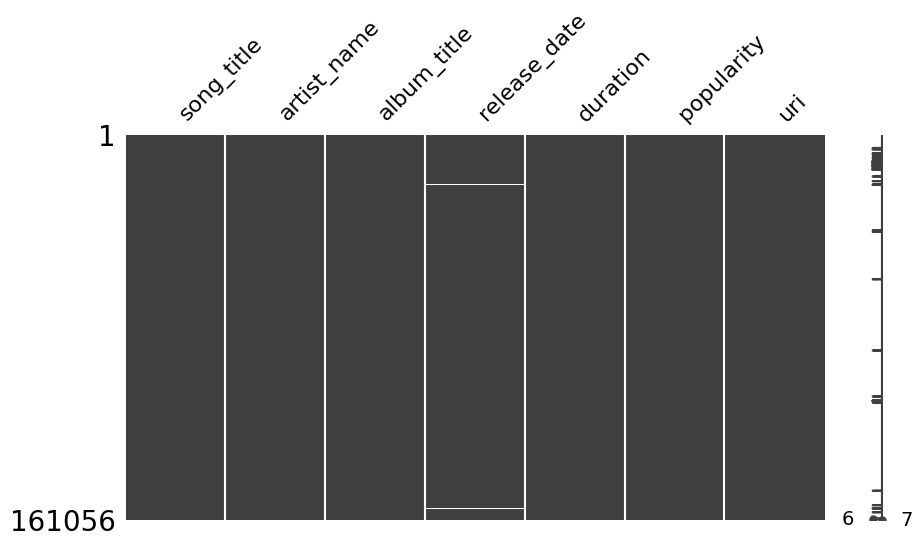

In [65]:
#  check if there are any null values
msno.matrix(tracks_df, figsize=(10,5))

There are null values in the release_date column: around <b>181</b> missing values.

<AxesSubplot: >

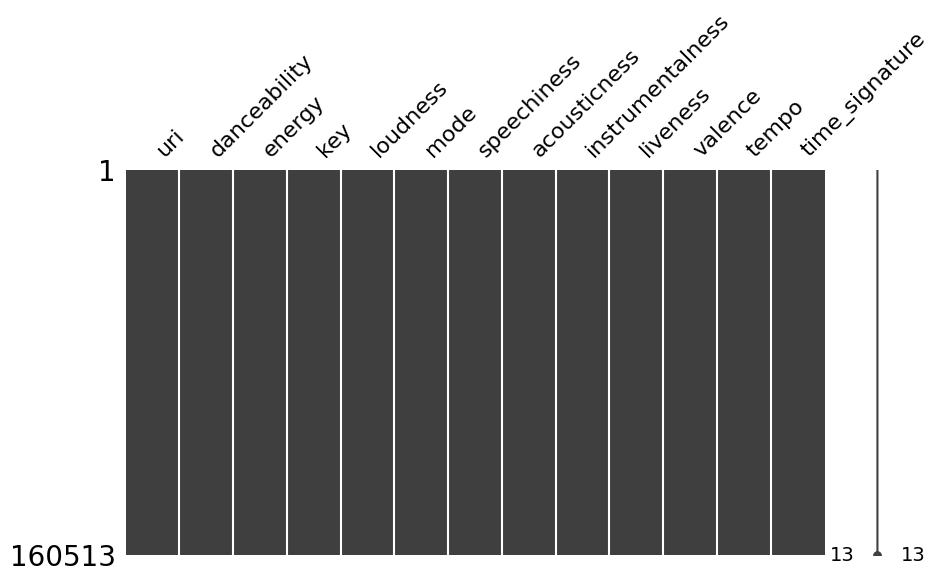

In [69]:
#  check if there are any null values
msno.matrix(audio_features_df, figsize=(10,5))

In [84]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
tracks_duplicated = tracks_df.duplicated(subset=["uri"])
tracks_duplicated_num = tracks_duplicated.sum()
tracks_total = tracks_df.shape[0]
tracks_duplicated_percent = (tracks_duplicated_num / tracks_total) * 100
print(f"{tracks_duplicated_percent: .2f}% ({tracks_duplicated_num} of {tracks_total}) of the Tracks dataset are duplicated entries.")

tracks_df[tracks_duplicated]

 28.47% (45848 of 161056) of the Tracks dataset are duplicated entries.


,song_title,artist_name,album_title,release_date,duration,popularity,uri
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN
...,...,...,...,...,...,...,...
161050,U Smile,Justin Bieber,My World 2.0,2010-01-01,196906,63,spotify:track:6Xw2FLih8m5ItDbyP992HH
161051,Born This Way,Lady Gaga,Born This Way,2011-01-01,260466,0,spotify:track:0FC7X3BRdEJC8L4ZEUAv2Q
161053,Walk,Foo Fighters,Wasting Light,2011-04-12,255960,71,spotify:track:76Je5Wklky23mVoxiRszcN
161054,Run the World (Girls),Beyoncé,4,2011-06-24,236093,37,spotify:track:7EdEUnekGCkChJzJyGp6TB


In [85]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
audiofeat_duplicated = audio_features_df.duplicated(subset=["uri"])
audiofeat_duplicated_num = audiofeat_duplicated.sum()
audiofeat_total = audio_features_df.shape[0]
audiofeat_duplicated_percent = (audiofeat_duplicated_num / audiofeat_total) * 100
print(f"{audiofeat_duplicated_percent: .2f}% ({audiofeat_duplicated_num} of {audiofeat_total}) of the audio features dataset are duplicated entries.")

audio_features_df[audiofeat_duplicated]

 28.51% (45766 of 160513) of the audio features dataset are duplicated entries.


,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.741,0.697,0,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,4
1330,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.741,0.783,4,-4.791,1,0.0415,0.015000,0.000000,0.3020,0.534,110.002,4
1380,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,0.663,0,-5.569,0,0.0281,0.228000,0.000000,0.0994,0.465,102.000,4
1544,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.681,0.372,5,-8.237,1,0.0432,0.640000,0.000000,0.1690,0.476,91.873,4
1651,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.494,0.796,11,-3.968,1,0.0738,0.381000,0.000000,0.0918,0.646,159.926,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160507,spotify:track:6Xw2FLih8m5ItDbyP992HH,0.705,0.590,1,-5.308,1,0.0284,0.504000,0.000000,0.1160,0.421,112.565,3
160508,spotify:track:0FC7X3BRdEJC8L4ZEUAv2Q,0.616,0.828,11,-4.736,1,0.1330,0.005780,0.000000,0.3520,0.576,123.986,4
160510,spotify:track:76Je5Wklky23mVoxiRszcN,0.234,0.865,9,-5.131,1,0.0516,0.000036,0.000532,0.2890,0.194,137.107,4
160511,spotify:track:7EdEUnekGCkChJzJyGp6TB,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.3720,0.760,127.086,4
